In [1]:
import os, pymfit, pandas,yaml
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from lbcred.utils import misc
from lbcred.model import imfit
from astropy.nddata import Cutout2D

## NGC628 LSB

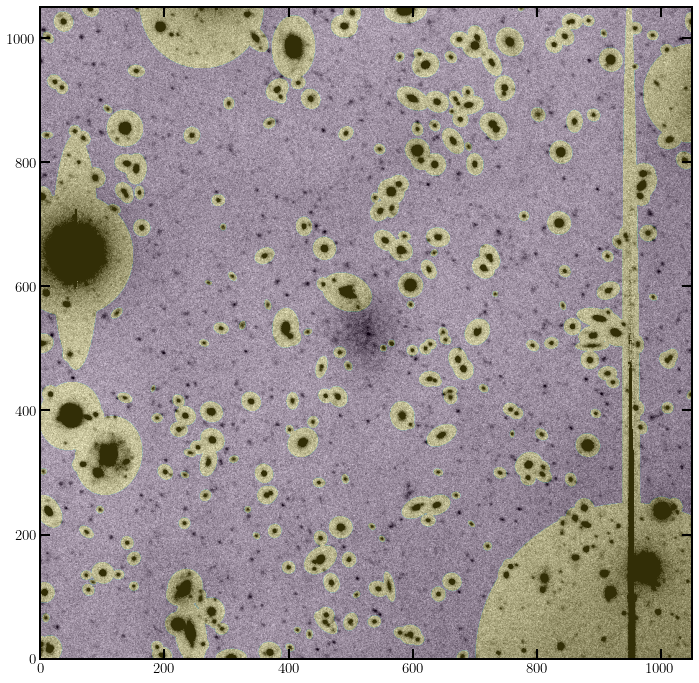

In [98]:
# Create mask
in_dir = '/Users/kirstencasey/Downloads/diagnostic-plots-LSBinitialremoveoutliertest_m3_SEsky_4pixaper_45ksat-USETHIS'
data_fn = 'mean_stack_cutout1_r.fits'
mask_fn = 'ngc628lsb_mask_r.fits'

data = fits.getdata(os.path.join(in_dir,data_fn))

mask_kws = dict(out_fn=os.path.join(in_dir,mask_fn), 
                thresh=4., kern_sig=1.0, backsize=15, obj_rmin=50, grow_obj=8, 
                use_hsc_mask=False, gal_pos=(525,525), seg_rmin=2000.)

mask = pymfit.make_mask(os.path.join(in_dir,data_fn), **mask_kws)


radii = [100,100,250,80,6,6]  
i_cs = [650,1050,1,910,508,500] # y
j_cs = [50,260,950,1050,565,552] # x
for r_circ, i_c, j_c in zip(radii,i_cs,j_cs):
    ii, jj = np.mgrid[:mask.shape[0], :mask.shape[1]]
    circ_mask = ((ii - i_c)**2 + (jj - j_c)**2) - r_circ**2 < 0
    mask = mask.astype(bool) | circ_mask


old_mask=fits.open(os.path.join(in_dir,mask_fn))
old_mask[0].data = mask.astype(float)
old_mask.writeto(os.path.join(in_dir,mask_fn),overwrite=True)


mask = mask.astype(bool)
vmin,vmax =  np.nanpercentile(data, [1, 97])
plt.figure(figsize=(12,12))
plt.imshow(data,vmin=vmin,vmax=vmax,cmap='gray_r',origin='lower')
plt.imshow(mask,origin='lower',alpha=0.2)

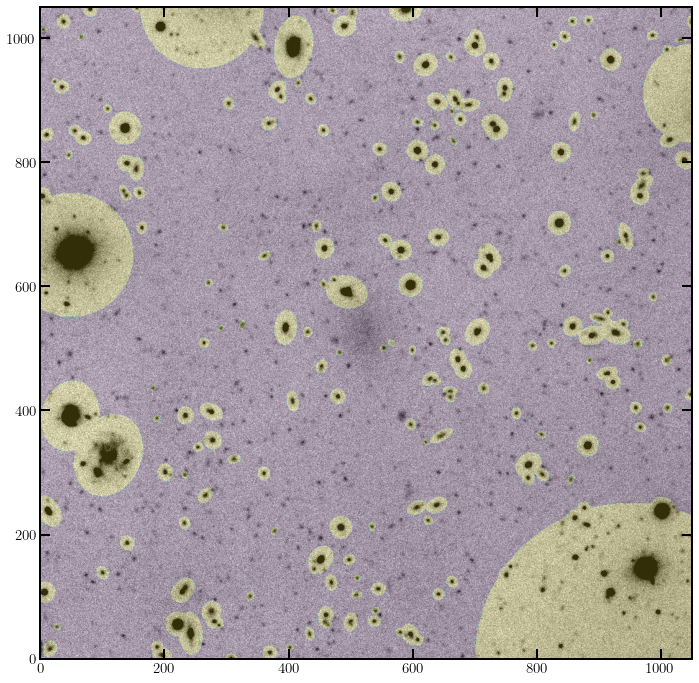

In [100]:
# Create mask
in_dir = '/Users/kirstencasey/Downloads/diagnostic-plots-LSBinitialremoveoutliertest_m3_SEsky_4pixaper_45ksat-USETHIS'
data_fn = 'mean_stack_cutout1_b.fits'
mask_fn = 'ngc628lsb_mask_b.fits'

data = fits.getdata(os.path.join(in_dir,data_fn))

mask_kws = dict(out_fn=os.path.join(in_dir,mask_fn), 
                thresh=4., kern_sig=1.0, backsize=15, obj_rmin=50, grow_obj=8, 
                use_hsc_mask=False, gal_pos=(525,525), seg_rmin=2000.)

mask = pymfit.make_mask(os.path.join(in_dir,data_fn), **mask_kws)


radii = [100,100,250,80,6,6]  
i_cs = [650,1050,1,910,508,500] # y
j_cs = [50,260,950,1050,565,552] # x
for r_circ, i_c, j_c in zip(radii,i_cs,j_cs):
    ii, jj = np.mgrid[:mask.shape[0], :mask.shape[1]]
    circ_mask = ((ii - i_c)**2 + (jj - j_c)**2) - r_circ**2 < 0
    mask = mask.astype(bool) | circ_mask


old_mask=fits.open(os.path.join(in_dir,mask_fn))
old_mask[0].data = mask.astype(float)
old_mask.writeto(os.path.join(in_dir,mask_fn),overwrite=True)


mask = mask.astype(bool)
vmin,vmax =  np.nanpercentile(data, [1, 99])
plt.figure(figsize=(12,12))
plt.imshow(data,vmin=vmin,vmax=vmax,cmap='gray_r',origin='lower')
plt.imshow(mask,origin='lower',alpha=0.2)

## DDO 13

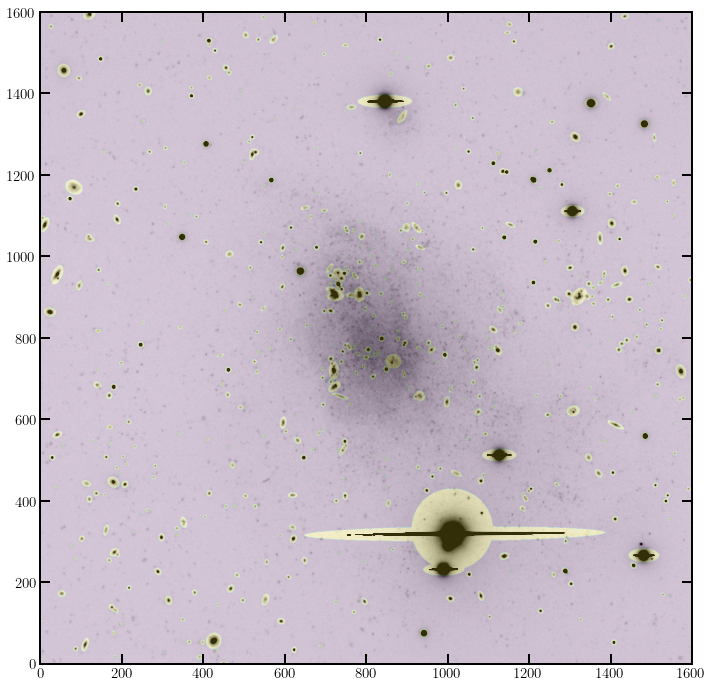

In [32]:
# Create mask
in_dir = '/Users/kirstencasey/Downloads/diagnostic-plots-DDO13UGC01171initialremoveoutliertest_m3_SEsky_4pixaper_55ksat-USETHIS'
data_fn = 'mean_stack_ddo13_cutout1_r.fits'
mask_fn = 'ddo13_mask_r.fits'

data = fits.getdata(os.path.join(in_dir,data_fn))

mask_kws = dict(out_fn=os.path.join(in_dir,mask_fn), 
                thresh=8, kern_sig=1.0, backsize=15, obj_rmin=10, grow_obj=4, 
                use_hsc_mask=False, gal_pos=(801,801), seg_rmin=2000.)

mask = pymfit.make_mask(os.path.join(in_dir,data_fn), **mask_kws)


radii = [100,]  
i_cs = [330,] # y
j_cs = [1010,] # x
for r_circ, i_c, j_c in zip(radii,i_cs,j_cs):
    ii, jj = np.mgrid[:mask.shape[0], :mask.shape[1]]
    circ_mask = ((ii - i_c)**2 + (jj - j_c)**2) - r_circ**2 < 0
    mask = mask.astype(bool) | circ_mask


old_mask=fits.open(os.path.join(in_dir,mask_fn))
old_mask[0].data = mask.astype(float)
old_mask.writeto(os.path.join(in_dir,mask_fn),overwrite=True)

mask = mask.astype(bool)
vmin,vmax =  np.nanpercentile(data, [1, 99.5])
plt.figure(figsize=(12,12))
plt.imshow(data,vmin=vmin,vmax=vmax,cmap='gray_r',origin='lower')
plt.imshow(mask,origin='lower',alpha=0.2)

In [33]:
inner_regions_mask = mask

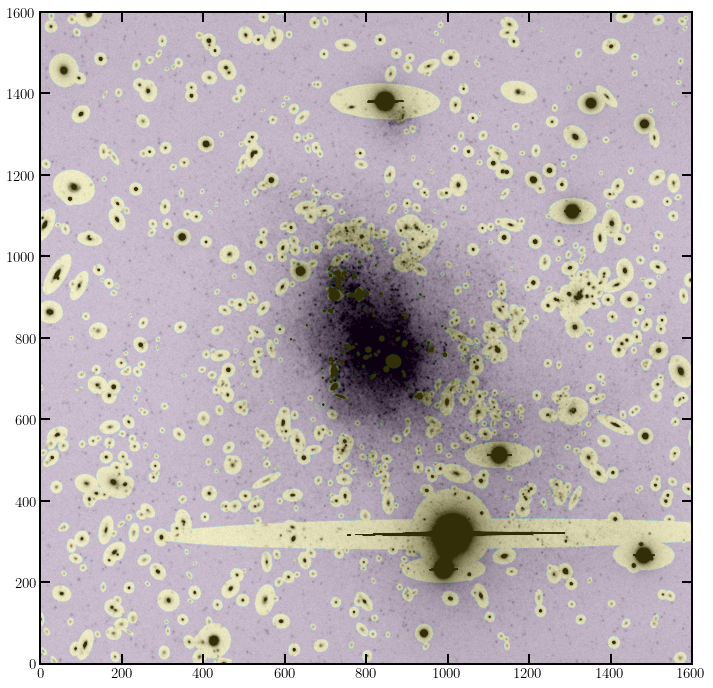

In [34]:
# Create mask
in_dir = '/Users/kirstencasey/Downloads/diagnostic-plots-DDO13UGC01171initialremoveoutliertest_m3_SEsky_4pixaper_55ksat-USETHIS'
data_fn = 'mean_stack_ddo13_cutout1_r.fits'
mask_fn = 'ddo13_mask_r.fits'

data = fits.getdata(os.path.join(in_dir,data_fn))

mask_kws = dict(out_fn=os.path.join(in_dir,mask_fn), 
                thresh=4, kern_sig=1.0, backsize=15, obj_rmin=200, grow_obj=8, 
                use_hsc_mask=False, gal_pos=(801,801), seg_rmin=2000.)

mask = pymfit.make_mask(os.path.join(in_dir,data_fn), **mask_kws)
mask = mask.astype(bool) | inner_regions_mask


radii = [80]  
i_cs = [330] # y
j_cs = [1010] # x
for r_circ, i_c, j_c in zip(radii,i_cs,j_cs):
    ii, jj = np.mgrid[:mask.shape[0], :mask.shape[1]]
    circ_mask = ((ii - i_c)**2 + (jj - j_c)**2) - r_circ**2 < 0
    mask = mask.astype(bool) | circ_mask


old_mask=fits.open(os.path.join(in_dir,mask_fn))
old_mask[0].data = mask.astype(float)
old_mask.writeto(os.path.join(in_dir,mask_fn),overwrite=True)

mask = mask.astype(bool)
vmin,vmax =  np.nanpercentile(data, [1, 98])
plt.figure(figsize=(12,12))
plt.imshow(data,vmin=vmin,vmax=vmax,cmap='gray_r',origin='lower')
plt.imshow(mask,origin='lower',alpha=0.2)

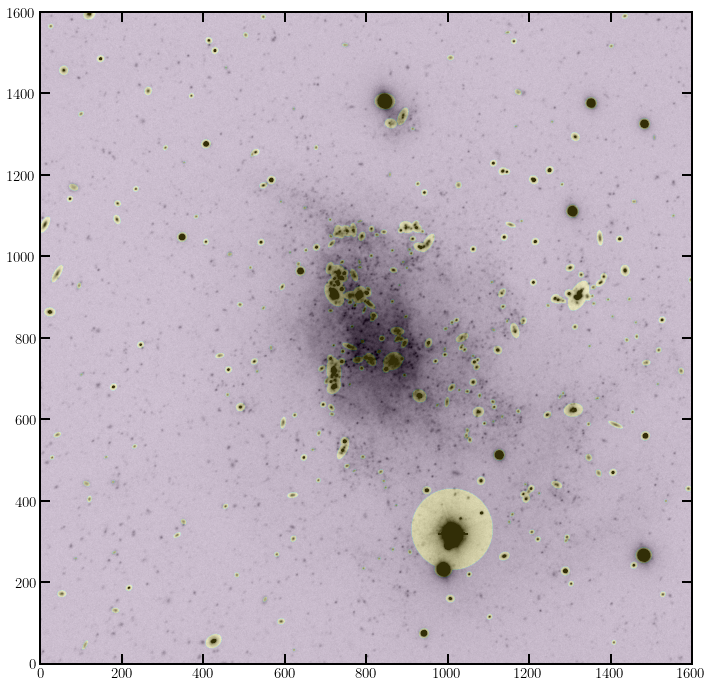

In [35]:
# Create mask
in_dir = '/Users/kirstencasey/Downloads/diagnostic-plots-DDO13UGC01171initialremoveoutliertest_m3_SEsky_4pixaper_55ksat-USETHIS'
data_fn = 'mean_stack_ddo13_cutout1_b.fits'
mask_fn = 'ddo13_mask_b.fits'

data = fits.getdata(os.path.join(in_dir,data_fn))

mask_kws = dict(out_fn=os.path.join(in_dir,mask_fn), 
                thresh=8, kern_sig=1.0, backsize=15, obj_rmin=10, grow_obj=5, 
                use_hsc_mask=False, gal_pos=(801,801), seg_rmin=2000.)

mask = pymfit.make_mask(os.path.join(in_dir,data_fn), **mask_kws)


radii = [100]  
i_cs = [330] # y
j_cs = [1010] # x
for r_circ, i_c, j_c in zip(radii,i_cs,j_cs):
    ii, jj = np.mgrid[:mask.shape[0], :mask.shape[1]]
    circ_mask = ((ii - i_c)**2 + (jj - j_c)**2) - r_circ**2 < 0
    mask = mask.astype(bool) | circ_mask


old_mask=fits.open(os.path.join(in_dir,mask_fn))
old_mask[0].data = mask.astype(float)
old_mask.writeto(os.path.join(in_dir,mask_fn),overwrite=True)

mask = mask.astype(bool)
vmin,vmax =  np.nanpercentile(data, [1, 99.5])
plt.figure(figsize=(12,12))
plt.imshow(data,vmin=vmin,vmax=vmax,cmap='gray_r',origin='lower')
plt.imshow(mask,origin='lower',alpha=0.2)

In [36]:
inner_regions_mask = mask

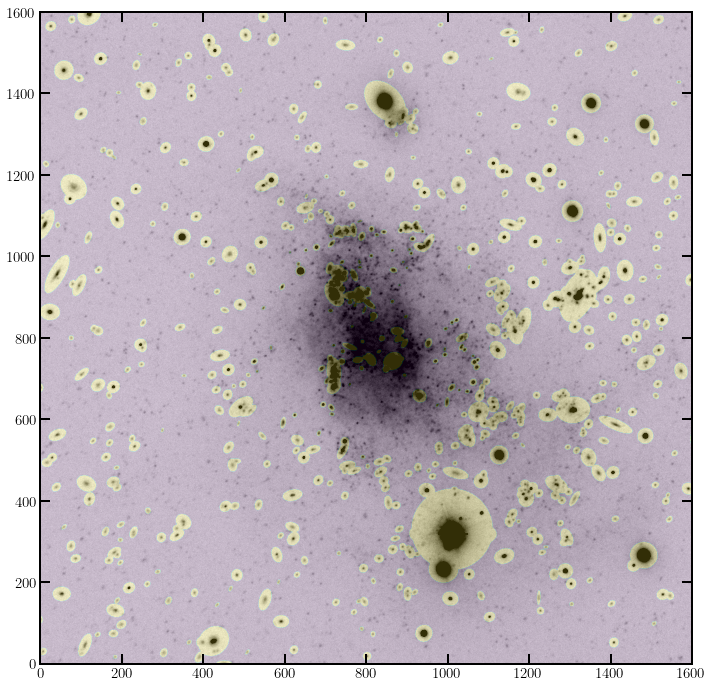

In [37]:
# Create mask
in_dir = '/Users/kirstencasey/Downloads/diagnostic-plots-DDO13UGC01171initialremoveoutliertest_m3_SEsky_4pixaper_55ksat-USETHIS'
data_fn = 'mean_stack_ddo13_cutout1_b.fits'
mask_fn = 'ddo13_mask_b.fits'

data = fits.getdata(os.path.join(in_dir,data_fn))

mask_kws = dict(out_fn=os.path.join(in_dir,mask_fn), 
                thresh=4.5, kern_sig=1.0, backsize=15, obj_rmin=300, grow_obj=8, 
                use_hsc_mask=False, gal_pos=(801,801), seg_rmin=2000.)

mask = pymfit.make_mask(os.path.join(in_dir,data_fn), **mask_kws)
mask = mask.astype(bool) | inner_regions_mask


radii = [80,]  
i_cs = [330,] # y
j_cs = [1010,] # x
for r_circ, i_c, j_c in zip(radii,i_cs,j_cs):
    ii, jj = np.mgrid[:mask.shape[0], :mask.shape[1]]
    circ_mask = ((ii - i_c)**2 + (jj - j_c)**2) - r_circ**2 < 0
    mask = mask.astype(bool) | circ_mask


old_mask=fits.open(os.path.join(in_dir,mask_fn))
old_mask[0].data = mask.astype(float)
old_mask.writeto(os.path.join(in_dir,mask_fn),overwrite=True)

mask = mask.astype(bool)
vmin,vmax =  np.nanpercentile(data, [1, 99])
plt.figure(figsize=(12,12))
plt.imshow(data,vmin=vmin,vmax=vmax,cmap='gray_r',origin='lower')
plt.imshow(mask,origin='lower',alpha=0.2)